In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv("./data/05_House Prices - Advanced Regression Techniques.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 문제1 핵심 수치형 변수 살펴보기

In [159]:
df[['SalePrice','LotArea','GrLivArea','GarageArea']].describe().T
# LotArea가 변수에 극단적인 분포를 가지고 있다.

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.0,163000.0,214000.00,755000.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.50,215245.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.5,1464.0,1776.75,5642.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.5,480.0,576.00,1418.0


### 문제2 박스플롯&산점도 시각화 

In [160]:
sum_db = df[['SalePrice','LotArea','GrLivArea','GarageArea']]

SalePrice


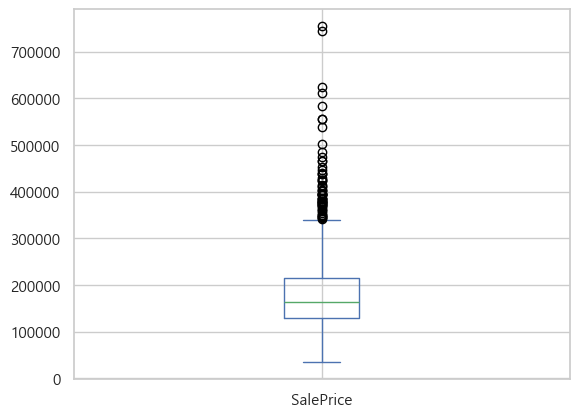

LotArea


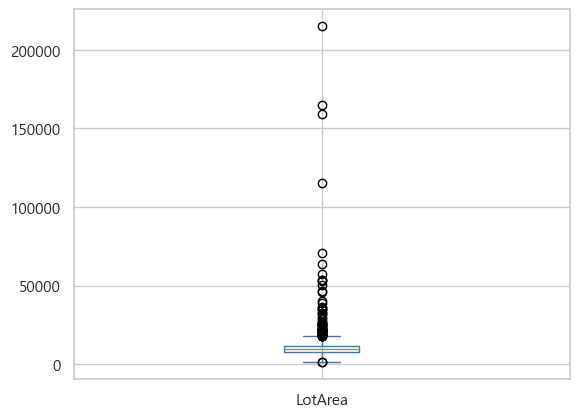

GrLivArea


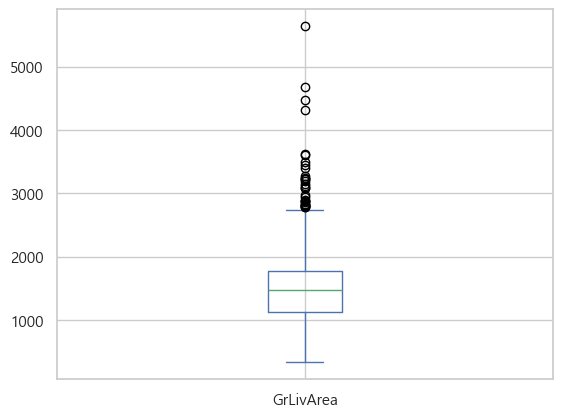

GarageArea


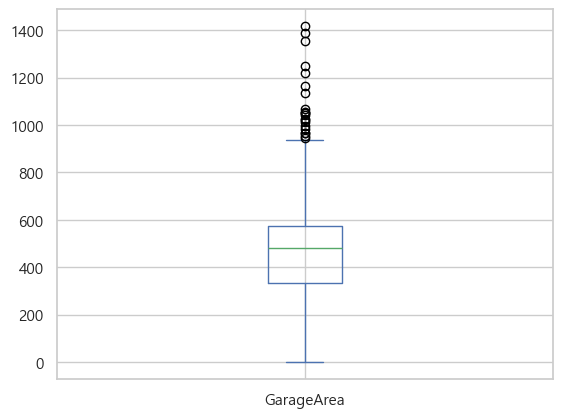

In [161]:
#박스플롯
for i in sum_db:
    print(i)
    sum_db[i].describe()
    sum_db[i].plot(kind="box")
    plt.show()

<Figure size 640x480 with 0 Axes>

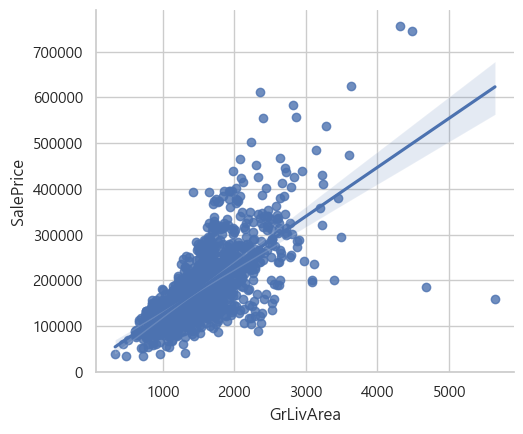

In [162]:
#산점도
plt.figure()
sns.lmplot(data=df,x='GrLivArea',y='SalePrice',height = 4.5, aspect=1.2 )
plt.show()

### 문제3 IQR 기반 이상값 경계

In [163]:
SP_IQR = df["SalePrice"].describe()

In [164]:
Q1 = SP_IQR['25%']
Q3 = SP_IQR['75%']
IQR = Q3-Q1

In [165]:
lower = Q1 -1.5*IQR
lower

np.float64(3937.5)

In [166]:
upper = Q3 + 1.5*IQR
upper

np.float64(340037.5)

In [167]:
# 범위를 벗어난 행의 개수와 비율
print(len(df[df["SalePrice"] > upper]))
len(df[df["SalePrice"] > upper]) / len(df) *100

61


4.178082191780822

In [168]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 문제4 면적 관련 이상값 탐지

In [169]:
GLA_IQR = df["GrLivArea"].describe()
GLA_IQR

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [170]:
GLA_Q1 = GLA_IQR['25%']
GLA_Q3 = GLA_IQR['75%']
GLA_IQRs = GLA_Q3-GLA_Q1

In [171]:
print(GLA_Q1,GLA_Q3,GLA_IQRs)

1129.5 1776.75 647.25


In [172]:
LA_IQR = df["LotArea"].describe()

In [173]:
LA_Q1 = LA_IQR['25%']
LA_Q3 = LA_IQR['75%']
LA_IQRs = LA_Q3-LA_Q1

In [174]:
print(LA_Q1,LA_Q3,LA_IQRs)

7553.5 11601.5 4048.0


In [175]:
lower_bround = GLA_Q1 - 1.5*GLA_IQRs

In [176]:
upper_bround = GLA_Q3 + 1.5*GLA_IQRs
upper_bround

np.float64(2747.625)

In [177]:
df[df['GrLivArea'] < lower_bround]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [178]:
#이상치 확인
df_outlier_area = df[df['GrLivArea'] > upper_bround]

In [179]:
df_outlier_area[['GrLivArea','SalePrice','OverallQual','Neighborhood']]

,GrLivArea,SalePrice,OverallQual,Neighborhood
58,2945,438780,10,StoneBr
118,3222,320000,7,SawyerW
185,3608,475000,10,OldTown
197,3112,235000,8,NAmes
231,2794,403000,8,NoRidge
304,3493,295000,7,OldTown
324,2978,242000,7,NAmes
496,3228,430000,8,NoRidge
523,4676,184750,10,Edwards
583,2775,325000,10,OldTown


### 문제5 면적 관련 이상값 탐지

In [180]:
df2 = df.copy()

In [181]:
df_outlier_area

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
118,119,60,RL,90.0,12376,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,320000
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
231,232,60,RL,174.0,15138,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,403000
304,305,75,RM,87.0,18386,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,295000
324,325,80,RL,96.0,11275,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,242000
496,497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000


In [182]:
df_outlier_area[['GrLivArea','SalePrice','OverallQual','Neighborhood']]

,GrLivArea,SalePrice,OverallQual,Neighborhood
58,2945,438780,10,StoneBr
118,3222,320000,7,SawyerW
185,3608,475000,10,OldTown
197,3112,235000,8,NAmes
231,2794,403000,8,NoRidge
304,3493,295000,7,OldTown
324,2978,242000,7,NAmes
496,3228,430000,8,NoRidge
523,4676,184750,10,Edwards
583,2775,325000,10,OldTown


In [183]:
g = df_outlier_area['OverallQual'] < df_outlier_area['OverallQual'].mean()
r  = df_outlier_area['GrLivArea'] > df_outlier_area['GrLivArea'].mean()

In [184]:
# 평균보다 품질 점수도 낮고 평균보다 크기간 큰 집
df_outlier_area[g & r]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
304,305,75,RM,87.0,18386,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,295000
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000
1268,1269,50,RL,NaN,14100,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,381000


### 문제6 이상치 처리 전략1 제거(drop)

In [185]:
df2['GarageArea']

0       548
1       460
2       608
3       642
4       836
       ... 
1455    460
1456    500
1457    252
1458    240
1459    276
Name: GarageArea, Length: 1460, dtype: int64

In [186]:
GLA_IQR = df2["GrLivArea"].describe()
GLA_IQR

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [187]:
GLA_Q1 = GLA_IQR['25%']
GLA_Q3 = GLA_IQR['75%']
GLA_IQRs = GLA_Q3-GLA_Q1

In [188]:
df_clean_drop= df2.drop(df_outlier_area.index)

In [189]:
# 행 개수 비교
print(len(df2))
print(len(df_clean_drop))

1460
1429


In [190]:
# 평균비교
print(df2['GrLivArea'].mean())
print(df_clean_drop['GrLivArea'].mean())

1515.463698630137
1476.7515745276417


In [191]:
# 표준편차 비교
print(df2['GrLivArea'].std())
print(df_clean_drop['GrLivArea'].std())

525.4803834232025
449.9280558805569


### 문제7 이상치 처리 전략2 - 클리핑(원저라이징)

In [192]:
maxmun = upper_bround

In [193]:
df2.loc[df2['GrLivArea'] > maxmun, 'GrLivArea'] =maxmun

C:\Users\Admin\AppData\Local\Temp\ipykernel_12136\1636714315.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2747.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[df2['GrLivArea'] > maxmun, 'GrLivArea'] =maxmun


In [196]:
df_clip = df2.loc[df2['GrLivArea'] == maxmun, 'GrLivArea']

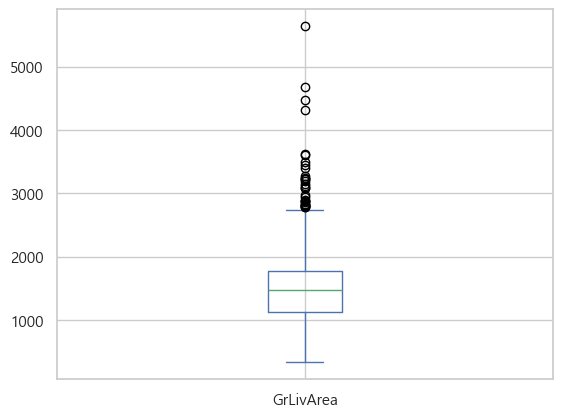

In [201]:
# 클리핑 전
plt.figure()
df['GrLivArea'].plot(kind='box')
plt.show()

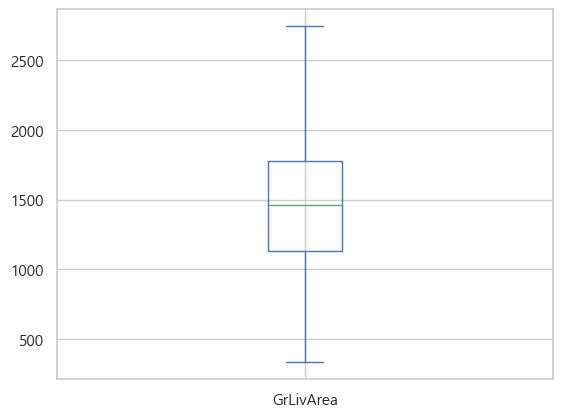

In [202]:
# 클리핑 후
plt.figure()
df2['GrLivArea'].plot(kind='box')
plt.show()

### 이상치 제거
* 장점
    * 간단하다,통계가 명확해진다
* 단점
    * 데이터가 손실, 분포 왜곡 가능성이 있다.
### 클리핑
* 장점
    * 데이터 손실이 방지, 분포 안정화
* 단점
    * 데이터 인위성,편향 발생 가능성이 있다.

### 문제8 이상치 처리 후 SalePrice 영향